In [1]:
from neuron import h
import os
import matplotlib.pyplot as plt

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))




#First compile our modfiles.
if os.system('nrnivmodl burster_modfiles/') == 0:
    print("Compilation Succeeded.")
else:
    print("Compilation Failed.")


Compilation Succeeded.


In [2]:
h.load_file('stdrun.hoc')

#Define simumulation parameters.
SIMRUNTIME = 1500
DELAY      = 400
INJTIME    = 500
I_INJ      = 0.2

h.tstop    = SIMRUNTIME
h.v_init   = -75

#Now set up vectors to record the membrane potential and the time.
potential = h.Vector()
time      = h.Vector()

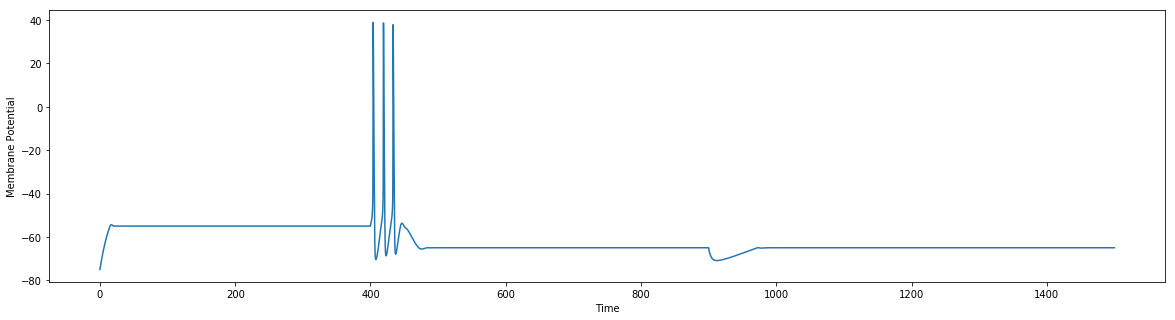

In [4]:
import numpy as np

tonic_soma = h.Section(name = 'soma')
dendrites = []
dendrites.append(h.Section(name = 'dend1'))
dendrites.append(h.Section(name = 'dend2'))

#Connect up the dendrites.
dendrites[0].connect(tonic_soma(0), 0)
dendrites[1].connect(tonic_soma(1), 0)

tonic_iclamp = h.IClamp(tonic_soma(0.5))
tonic_iclamp.dur   = INJTIME
tonic_iclamp.amp   = I_INJ
tonic_iclamp.delay = DELAY

#We will make a super simple one compartement tonic spiking cell.
tonic_soma.nseg = 1
tonic_soma.L    = 25
tonic_soma.diam = 24.75

dendrites[0].nseg = 8
dendrites[0].L    = 270
dendrites[0].diam = 3

dendrites[1].nseg = 1
dendrites[1].L    = 400
dendrites[1].diam = 5


#Now insert the two segregated modules into the cell.
#First insert the passive module.
tonic_soma.insert('leakCA3')
tonic_soma.insert('hdCA3')

#Now insert the spiking module.
tonic_soma.insert('natCA3')
tonic_soma.insert('kdrCA3')

#Insert the bursting module.
tonic_soma.insert('capool')
tonic_soma.insert('cal')
tonic_soma.insert('sAHP')
tonic_soma.insert('cas')

for dend in dendrites:
    dend.insert('leakCA3')
    dend.insert('hdCA3')

    dend.insert('natCA3')
    dend.insert('kdrCA3')

    dend.insert('capool')
    dend.insert('cal')
    dend.insert('sAHP')
    dend.insert('cas')


#record time and membrane potential for tonic cell.
#Record the membrane variables.
time.record(h._ref_t) 
potential.record(tonic_soma(0.5)._ref_v)


def run_model(amp, gleak, gna, gkdr, gh, gsahp, gcal, gcas):

    tonic_iclamp.amp = amp

    tonic_soma.glbar_leakCA3   = gleak #1.53*3e-5
    tonic_soma.gbar_natCA3     = gna
    tonic_soma.gbar_kdrCA3     = gkdr
    tonic_soma.ghdbar_hdCA3    = gh
    tonic_soma.gsAHPbar_sAHP   = gsahp
    tonic_soma.gcalbar_cal     = gcal
    tonic_soma.gbar_cas        = gcas
    
    h.run()


#Set the default parameters for the simulations.

default = [I_INJ, 1.53*3e-5, 0.09, 0.03, 1.0e-5, 
                  0.003    , 0.01, 0.002  ]

run_model(default[0], default[1], default[2], default[3], default[4], default[5], default[6], default[7])
